In [2]:
#Global library
import pandas as pd
import numpy as np
import xgboost as xgb

#Plot library
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5.28) 
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.titleweight"] = 600

sns.set_color_codes("pastel")

#Preprocessing dataset library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

#Algorithm library
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.svm import SVC #SVM
from sklearn.neural_network import MLPClassifier #ANN
from sklearn.linear_model import LogisticRegression #LR

#Testing library
from sklearn import metrics

#Preprocessing dataset library
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#Processing dataset CICIDS2017 - Load all dataset then delete null value and infinity

#Load CSV - Attack on CICIDS2017 is ordered by day from monday until friday. There are 8 dataset total in CICIDS2017
df1_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv')
df2_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv')
df3_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv')
df4_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df5_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df6_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df7_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df8_cicids2017 = pd.read_csv('/Users/auliawardan/python/anomaly-detection/preprocessing/CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv')

#We will look distribution of traffic and number of column in each day
print("Dataset1 traffic size is {} rows and {} columns".format(df1_cicids2017.shape[0],df1_cicids2017.shape[1]))
print("Dataset2 traffic size is {} rows and {} columns".format(df2_cicids2017.shape[0],df2_cicids2017.shape[1]))
print("Dataset3 traffic size is {} rows and {} columns".format(df3_cicids2017.shape[0],df3_cicids2017.shape[1]))
print("Dataset4 traffic size is {} rows and {} columns".format(df4_cicids2017.shape[0],df4_cicids2017.shape[1]))
print("Dataset5 traffic size is {} rows and {} columns".format(df5_cicids2017.shape[0],df5_cicids2017.shape[1]))
print("Dataset6 traffic size is {} rows and {} columns".format(df6_cicids2017.shape[0],df6_cicids2017.shape[1]))
print("Dataset7 traffic size is {} rows and {} columns".format(df7_cicids2017.shape[0],df7_cicids2017.shape[1]))

Dataset1 traffic size is 529918 rows and 79 columns
Dataset2 traffic size is 445909 rows and 79 columns
Dataset3 traffic size is 692703 rows and 79 columns
Dataset4 traffic size is 288602 rows and 79 columns
Dataset5 traffic size is 170366 rows and 79 columns
Dataset6 traffic size is 225745 rows and 79 columns
Dataset7 traffic size is 286467 rows and 79 columns


In [4]:
#Processing dataset CICIDS2017 - Looking null value and infinity in all dataset.

#Treat inf value same as NA value
pd.options.mode.use_inf_as_na = True

#Looking infinity and NA value
print("Dataset1 NA values")
print(df1_cicids2017.loc[:, df1_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset2 NA values")
print(df2_cicids2017.loc[:, df2_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset3 NA values")
print(df3_cicids2017.loc[:, df3_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset4 NA values")
print(df4_cicids2017.loc[:, df4_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset5 NA values")
print(df5_cicids2017.loc[:, df5_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset6 NA values")
print(df6_cicids2017.loc[:, df6_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset7 NA values")
print(df7_cicids2017.loc[:, df7_cicids2017.isnull().any()].isnull().sum())
print("=====================")
print("Dataset8 NA values")
print(df8_cicids2017.loc[:, df8_cicids2017.isnull().any()].isnull().sum())

Dataset1 NA values
Flow Bytes/s       437
 Flow Packets/s    437
dtype: int64
Dataset2 NA values
Flow Bytes/s       264
 Flow Packets/s    264
dtype: int64
Dataset3 NA values
Flow Bytes/s       1297
 Flow Packets/s    1297
dtype: int64
Dataset4 NA values
Flow Bytes/s       207
 Flow Packets/s    207
dtype: int64
Dataset5 NA values
Flow Bytes/s       135
 Flow Packets/s    135
dtype: int64
Dataset6 NA values
Flow Bytes/s       34
 Flow Packets/s    34
dtype: int64
Dataset7 NA values
Flow Bytes/s       371
 Flow Packets/s    371
dtype: int64
Dataset8 NA values
Flow Bytes/s       122
 Flow Packets/s    122
dtype: int64


In [5]:
#Processing dataset CICIDS2017 - Delete null value and infinity.

#NA and infinity values are minority of the dataset. Because they cannot be processed by algorithms, so they must deleted
df1_cicids2017 = df1_cicids2017.dropna()
df2_cicids2017 = df2_cicids2017.dropna()
df3_cicids2017 = df3_cicids2017.dropna()
df4_cicids2017 = df4_cicids2017.dropna()
df5_cicids2017 = df5_cicids2017.dropna()
df6_cicids2017 = df6_cicids2017.dropna()
df7_cicids2017 = df7_cicids2017.dropna()
df8_cicids2017 = df8_cicids2017.dropna()

#Check the size after deleting infinity and NA value
print("Dataset1 traffic size is {} rows and {} columns".format(df1_cicids2017.shape[0],df1_cicids2017.shape[1]))
print("Dataset2 traffic size is {} rows and {} columns".format(df2_cicids2017.shape[0],df2_cicids2017.shape[1]))
print("Dataset3 traffic size is {} rows and {} columns".format(df3_cicids2017.shape[0],df3_cicids2017.shape[1]))
print("Dataset4 traffic size is {} rows and {} columns".format(df4_cicids2017.shape[0],df4_cicids2017.shape[1]))
print("Dataset5 traffic size is {} rows and {} columns".format(df5_cicids2017.shape[0],df5_cicids2017.shape[1]))
print("Dataset6 traffic size is {} rows and {} columns".format(df6_cicids2017.shape[0],df6_cicids2017.shape[1]))
print("Dataset7 traffic size is {} rows and {} columns".format(df7_cicids2017.shape[0],df7_cicids2017.shape[1]))

Dataset1 traffic size is 529481 rows and 79 columns
Dataset2 traffic size is 445645 rows and 79 columns
Dataset3 traffic size is 691406 rows and 79 columns
Dataset4 traffic size is 288395 rows and 79 columns
Dataset5 traffic size is 170231 rows and 79 columns
Dataset6 traffic size is 225711 rows and 79 columns
Dataset7 traffic size is 286096 rows and 79 columns


In [6]:
#Processing dataset CICIDS2017 - Concat all dataset and put all into single DataFrame.

#Concat all data
df_cicids2017 = pd.concat([df1_cicids2017, df2_cicids2017, df3_cicids2017, df4_cicids2017, df5_cicids2017, df6_cicids2017, df7_cicids2017, df8_cicids2017], ignore_index=True)

#Print info
df_cicids2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [7]:
#Feature selection phase - find column with all zero values

#Search zero value
dataset_info = df_cicids2017.describe()
df_cicids2017_zero = dataset_info.loc[:,(dataset_info.iloc[1:] == 0).all()]

#Print feature with zero value
df_cicids2017_zero

Bwd PSH Flags   Bwd URG Flags  Fwd Avg Bytes/Bulk  \
count       2827876.0       2827876.0           2827876.0   
mean              0.0             0.0                 0.0   
std               0.0             0.0                 0.0   
min               0.0             0.0                 0.0   
25%               0.0             0.0                 0.0   
50%               0.0             0.0                 0.0   
75%               0.0             0.0                 0.0   
max               0.0             0.0                 0.0   

        Fwd Avg Packets/Bulk   Fwd Avg Bulk Rate   Bwd Avg Bytes/Bulk  \
count              2827876.0           2827876.0            2827876.0   
mean                     0.0                 0.0                  0.0   
std                      0.0                 0.0                  0.0   
min                      0.0                 0.0                  0.0   
25%                      0.0                 0.0                  0.0   
50%                      0.0                 0.0                  0.0   
75%                      0.0                 0.0                  0.0   
max                      0.0                 0.0                  0.0   

        Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  
count              2827876.0          2827876.0  
mean                     0.0                0.0  
std                      0.0                0.0  
min                      0.0                0.0  
25%                      0.0                0.0  
50%                      0.0                0.0  
75%                      0.0                0.0  
max                      0.0                0.0

In [8]:
#Feature selection phase - Cut out features that are reduntant - all zero values 

#Removing [8] features from previous cell - they are reduntant 
df_cicids2017.drop(columns=df_cicids2017_zero, inplace=True)

#Check if resulting DataFrame valid
print("Total data {} rows and {} columns".format(df_cicids2017.shape[0],df_cicids2017.shape[1])) 

Total data 2827876 rows and 71 columns


In [9]:
#Processing dataset CICIDS2017 - Rename labels that contain non-printable characters
print("Before...")
print(df_cicids2017.loc[:," Label"].unique())

print("--------------------------------")

df_cicids2017.loc[:," Label"].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)
print("After..")
print(df_cicids2017.loc[:," Label"].unique())

#Remove trailing & leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
df_cicids2017.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'DDoS' 'PortScan' 'Bot']
--------------------------------
After..
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Infiltration' 'Brute Force'
 'XSS' 'Sql Injection' 'DDoS' 'PortScan' 'Bot']


In [10]:
#Processing dataset CICIDS2017 - Temporarily add new column to distinguish traffic type between Normal / Attack 
trf_type = df_cicids2017.loc[:, "Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Abnormal")
trf_type.name = "traffic type"
df_cicids2017.loc[:, trf_type.name] = trf_type

#Check if resulting DataFrame valid
print("Total data {} rows and {} columns".format(df_cicids2017.shape[0],df_cicids2017.shape[1])) 

Total data 2827876 rows and 72 columns


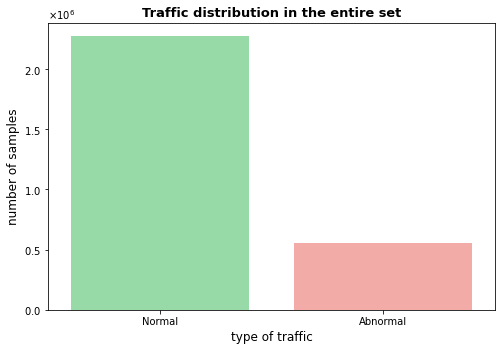

In [11]:
#Processing dataset CICIDS2017 - Plot distrtibution of Normal traffic and Abnormal traffic in the whole dataset 

plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)
sns.countplot(x="traffic type", data=df_cicids2017, palette=["g","r"])
plt.title("Traffic distribution in the entire set")
plt.xlabel("type of traffic")
plt.ylabel("number of samples")
plt.show()

In [12]:
#Processing dataset CICIDS2017 - Normal traffic greatly outweights then Abnormal traffic. To avoid for the model to be biased towards one type of traffic, it has to be downsampled

rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85)

df_cicids2017.drop(["traffic type"], axis=1, inplace=True)

df_cicids2017_res, trf_type_res = rus.fit_resample(df_cicids2017, trf_type)

df_cicids2017 = df_cicids2017_res.join(trf_type_res, how="inner")

#Check if resulting DataFrame valid
print("Total data {} rows and {} columns".format(df_cicids2017.shape[0],df_cicids2017.shape[1])) 

Total data 1211327 rows and 72 columns


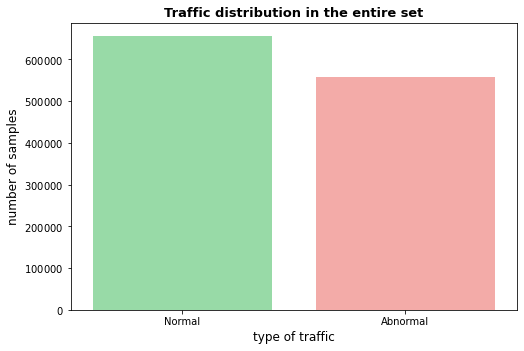

In [13]:
#Processing dataset CICIDS2017 - Show distribution chart after downsampling huge Normal traffic 

plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)
sns.countplot(x="traffic type", data=df_cicids2017, order=["Normal", "Abnormal"],  palette=["g","r"])
plt.title("Traffic distribution in the entire set")
plt.xlabel("type of traffic")
plt.ylabel("number of samples")
plt.show()

In [14]:
#Processing dataset CICIDS2017 - Split dataset into training and testing
train_cicids2017, test_cicids2017 = train_test_split(df_cicids2017, test_size = 0.3, random_state = 10)
  
cols = train_cicids2017.select_dtypes(include=['float64','int64']).columns
sc_train_cicids2017 = scaler.fit_transform(train_cicids2017.select_dtypes(include=['float64','int64']))
sc_test_cicids2017 = scaler.fit_transform(test_cicids2017.select_dtypes(include=['float64','int64']))

sc_traindf_cicids2017 = pd.DataFrame(sc_train_cicids2017, columns = cols)
sc_testdf_cicids2017 = pd.DataFrame(sc_test_cicids2017, columns = cols)

trainDep_cicids2017 = train_cicids2017['traffic type'].values.reshape(-1,1)
trainDep_cicids2017 = onehotencoder.fit_transform(trainDep_cicids2017).toarray()
testDep_cicids2017 = test_cicids2017['traffic type'].values.reshape(-1,1)
testDep_cicids2017 = onehotencoder.fit_transform(testDep_cicids2017).toarray()

train_X_cicids2017 = sc_traindf_cicids2017
train_y_cicids2017 = trainDep_cicids2017[:,0]

test_X_cicids2017 = sc_testdf_cicids2017
test_y_cicids2017 = testDep_cicids2017[:,0]

In [15]:
#Training and testing phase

# Train K-Nearest Neighbors Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(train_X_cicids2017, train_y_cicids2017); 

models = []
models.append(('K-Nearest Neighbors Classifier', KNN_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


==================== K-Nearest Neighbors Classifier Model Test Results ====================

Model Accuracy:
 0.9661886796606485

Confusion matrix:
 [[194011   2535]
 [  9752 157101]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    196546
         1.0       0.98      0.94      0.96    166853

    accuracy                           0.97    363399
   macro avg       0.97      0.96      0.97    363399
weighted avg       0.97      0.97      0.97    363399




In [16]:
# Train Gaussian Naive Baye Model
NB_Classifier = GaussianNB()
NB_Classifier.fit(train_X_cicids2017, train_y_cicids2017)

models = []
models.append(('Naive Bayes Classifier', NB_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


==================== Naive Bayes Classifier Model Test Results ====================

Model Accuracy:
 0.5461655095363499

Confusion matrix:
 [[196546      0]
 [164923   1930]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.54      1.00      0.70    196546
         1.0       1.00      0.01      0.02    166853

    accuracy                           0.55    363399
   macro avg       0.77      0.51      0.36    363399
weighted avg       0.75      0.55      0.39    363399




In [17]:
# Train Decision Tree Model
DT_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_Classifier.fit(train_X_cicids2017, train_y_cicids2017)

models = []
models.append(('Decision Tree Classifier', DT_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


==================== Decision Tree Classifier Model Test Results ====================

Model Accuracy:
 0.7538050462439357

Confusion matrix:
 [[194949   1597]
 [ 87870  78983]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.69      0.99      0.81    196546
         1.0       0.98      0.47      0.64    166853

    accuracy                           0.75    363399
   macro avg       0.83      0.73      0.73    363399
weighted avg       0.82      0.75      0.73    363399




In [18]:
# Train Random Forest Model
RF_Classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_Classifier.fit(train_X_cicids2017, train_y_cicids2017)

models = []
models.append(('Random Forest Classifier', RF_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


==================== Random Forest Classifier Model Test Results ====================

Model Accuracy:
 0.8622395768838109

Confusion matrix:
 [[151590  44956]
 [  5106 161747]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.77      0.86    196546
         1.0       0.78      0.97      0.87    166853

    accuracy                           0.86    363399
   macro avg       0.87      0.87      0.86    363399
weighted avg       0.88      0.86      0.86    363399




In [19]:
# Train Support Vector Machine Model
SVM_Classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM_Classifier.fit(train_X_cicids2017, train_y_cicids2017)

models = []
models.append(('Support Vector Machine Classifier', SVM_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


==================== Support Vector Machine Classifier Model Test Results ====================

Model Accuracy:
 0.9690863210960955

Confusion matrix:
 [[189040   7506]
 [  3728 163125]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97    196546
         1.0       0.96      0.98      0.97    166853

    accuracy                           0.97    363399
   macro avg       0.97      0.97      0.97    363399
weighted avg       0.97      0.97      0.97    363399




In [20]:
# Train Artificial Neural Network Model
ANN_Classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN_Classifier.fit(train_X_cicids2017, train_y_cicids2017)

models = []
models.append(('Artificial Neural Network Classifier', ANN_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



==================== Artificial Neural Network Classifier Model Test Results ====================

Model Accuracy:
 0.9741688887421264

Confusion matrix:
 [[189785   6761]
 [  2626 164227]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    196546
         1.0       0.96      0.98      0.97    166853

    accuracy                           0.97    363399
   macro avg       0.97      0.97      0.97    363399
weighted avg       0.97      0.97      0.97    363399




In [21]:
# Train Logistic Regression Model
LR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LR_Classifier.fit(train_X_cicids2017, train_y_cicids2017);

models = []
models.append(('Logistic Regression Classifier', LR_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(test_y_cicids2017, v.predict(test_X_cicids2017))
    confusion_matrix = metrics.confusion_matrix(test_y_cicids2017, v.predict(test_X_cicids2017))
    classification = metrics.classification_report(test_y_cicids2017, v.predict(test_X_cicids2017))
    print()
    print('==================== {} Model Test Results ===================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



==================== Logistic Regression Classifier Model Test Results ====================

Model Accuracy:
 0.9261803142000941

Confusion matrix:
 [[178327  18219]
 [  8607 158246]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    196546
         1.0       0.90      0.95      0.92    166853

    accuracy                           0.93    363399
   macro avg       0.93      0.93      0.93    363399
weighted avg       0.93      0.93      0.93    363399


